In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py

%matplotlib inline

In [11]:
h5_filepath_e = "electrons.h5"
h5_filepath_n = "neutrons.h5"

# Explore h5 data format

(array([   0.,    0.,    0.,    0.,  903., 1978., 2107., 2044., 2000.,
        1993., 1885., 1944., 1960., 1915., 1863., 1779., 1805., 1693.,
        1725., 1570., 1521., 1458., 1437., 1210., 1098.,  970.,  805.,
         660.,  448.,  320.,  174.,  136.,   69.,   37.,   23.,    8.,
           5.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.]),
 array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
         78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
        156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
        234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294]),
 <a list of 49 Patch objects>)

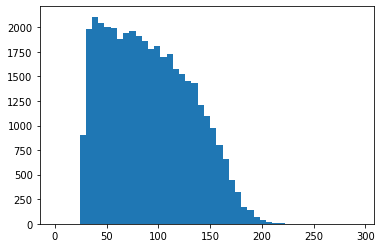

In [14]:
with h5py.File(h5_filepath_e, 'r') as file:
    h5_event_data = file['event_data']
    event_mem_data = np.memmap(h5_filepath_e, mode='r', shape=h5_event_data.shape,
                               offset=h5_event_data.id.get_offset(),
                               dtype=h5_event_data.dtype)
    hit = [np.count_nonzero(event_mem_data[i,:,0]) for i in range(0, event_mem_data.shape[0])]
hit  = np.array(hit)
plt.hist(hit, bins=np.arange(0, 300, 6))

In [13]:
with h5py.File(h5_filepath_e, 'r') as file:
    print(list(file.keys()))
    angles = np.array(file['angles'])
    print('angles', angles.shape, angles[0,:])
    energies = np.array(file['energies'])
    print('energies', energies.shape, energies[0,:])
    event_data = np.array(file['event_data'])
    print('event_data', event_data.shape, event_data[0,:,:])
    event_ids = np.array(file['event_ids'])
    print('event_ids', event_ids.shape, event_ids[0])
    labels = np.array(file['labels'])
    print('labels', labels.shape, labels[0])
    positions = np.array(file['positions'])
    print('positions', positions.shape, positions[0,:,:])
    root_files = np.array(file['root_files'])
    print('root_files', root_files.shape, root_files[0])
    
    #event_mem_data = np.memmap(h5_filepath_e, mode='r', shape=event_data.shape,
    #                           offset=event_data.id.get_offset(),
    #                           dtype=event_data.dtype)
    hit = [np.count_nonzero(event_data[i,:,0]) for i in range(0, event_data.shape[0])]
    hit = np.array(hit)
    energies = energies[:,0]
    print(labels.shape, energies.shape, hit.shape)
    #np.savez("label_energy_hit.npz", label=labels, energy=energies, hit=hit)

['angles', 'energies', 'event_data', 'event_ids', 'labels', 'positions', 'root_files']
angles (78786, 2) [ 2.55912   -2.3508599]
energies (78786, 1) [7.9594355]


MemoryError: Unable to allocate array with shape (78786, 10184, 2) and data type float32

## Overall data

(array([ 0.,  0.,  0.,  0., 20., 39., 43., 55., 39., 48., 48., 36., 33.,
        37., 42., 28., 26., 34., 35., 36., 28., 21., 27., 26., 29., 15.,
        14., 16.,  4.,  8.,  6.,  2.,  1.,  1.,  3.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
         78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
        156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
        234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294]),
 <a list of 49 Patch objects>)

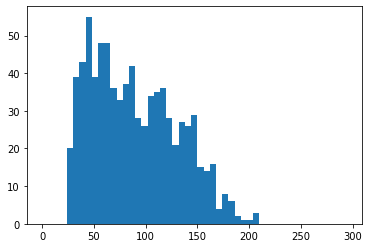

In [4]:
#print(hit)
plt.hist(hit, bins=np.arange(0, 300, 6))


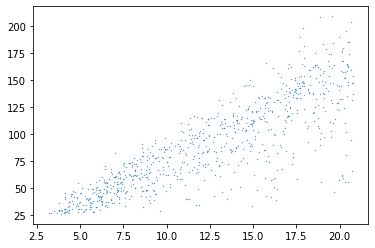

In [5]:
plt.scatter(energies, hit, s=0.1)


In [6]:
# max energy
print(max(energies))

20.76303


(array([49., 86., 93., 86., 70., 72., 87., 87., 84., 86.]),
 array([ 3.1837108,  4.9416428,  6.6995745,  8.457506 , 10.215438 ,
        11.97337  , 13.731302 , 15.489234 , 17.247166 , 19.005096 ,
        20.76303  ], dtype=float32),
 <a list of 10 Patch objects>)

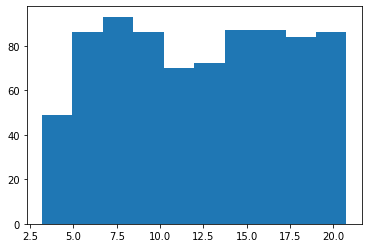

In [7]:
plt.hist(energies)


# Event value check

In [8]:
# with h5py.File(h5_filepath, 'r') as file:
    
#     h5_event_data = file['event_data']
#     length = h5_event_data.shape[0]
#     print(length)
    
#     event_subset = h5_event_data[sorted(np.random.permutation(length)[:20])]
#     event_subset = np.array(event_subset)
    
#     charge_per_event = event_subset[:,:,0]
#     time_per_event = event_subset[:,:,1]

# print(charge_per_event.shape, time_per_event.shape)
# np.savez("charge_time.npz", charge_per_event=charge_per_event, time_per_event=time_per_event)

In [9]:
charge_per_event = event_data[:,:,0][:20]
time_per_event = event_data[:,:,1][:20]

## Time

In [10]:
time_per_event = [time_per_event[i][np.nonzero(time_per_event[i])] for i in range(time_per_event.shape[0])]

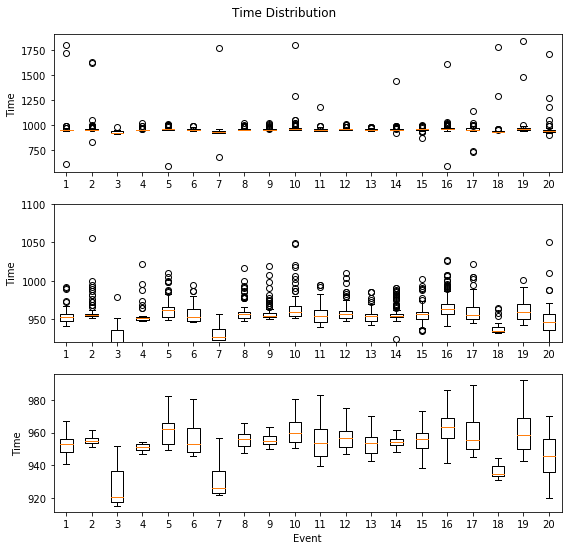

In [11]:
fig = plt.figure(figsize=(8,8))
fig.suptitle("Time Distribution")

plt.subplot(311)
plt.boxplot(time_per_event)
plt.ylabel("Time")

plt.subplot(312)
plt.boxplot(time_per_event)
plt.ylim([920,1100])
plt.ylabel("Time")

plt.subplot(313)
plt.boxplot(time_per_event, showfliers=False)
plt.ylabel("Time")
plt.xlabel("Event")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Charge

In [12]:
charge_per_event = [charge_per_event[i][np.nonzero(charge_per_event[i])] for i in range(charge_per_event.shape[0])]

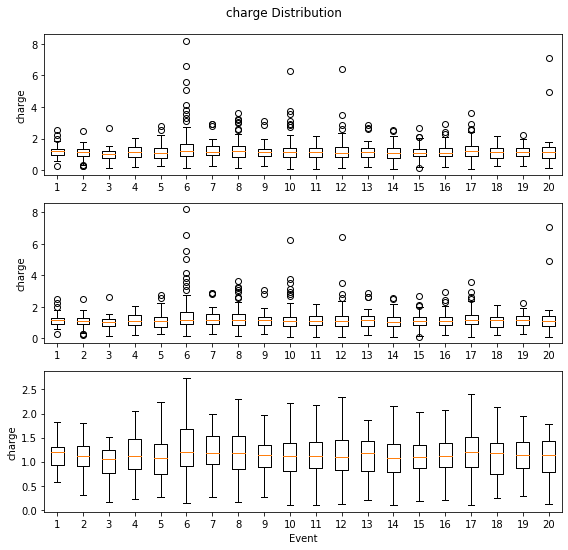

In [13]:
fig = plt.figure(figsize=(8,8))
fig.suptitle("charge Distribution")

plt.subplot(311)
plt.boxplot(charge_per_event)
plt.ylabel("charge")

plt.subplot(312)
plt.boxplot(charge_per_event)
plt.ylabel("charge")

plt.subplot(313)
plt.boxplot(charge_per_event, showfliers=False)
plt.ylabel("charge")
plt.xlabel("Event")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])